# Price Prediction for Madrid – Airbnb listings

<font size=3> Travelling has different meanings depending on the person asked. It may mean that someone is exploring new places for their joy for some it might be a dialy thing for business purposes etc. Irrespective of the reason (leisure or business), we can see that travelling is a major business for airlines, trains, hotels and especially AirBnb. 
</font>

<font size=3> [Inside Airbnb](http://insideairbnb.com/get-the-data/) is a mission driven project that provides data and advocacy about Airbnb's impact on residential communities. Europe is generally a top-preferred destination and I chose Madrid as the final city for this project (HALA MADRID!!!). You can download the data set used in the project [here](http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2022-09-11/data/listings.csv.gz). If you want to browse and download it, you can go to [Inside Airbnb](http://insideairbnb.com/get-the-data/), browse to Madrid and download Detailed Listings data.
  

<font size=3> If you ever tried to book an Airbnb (especially in Europe), you would be flabergasted on why prices on some listing is very though the other details say otherwise. Moreover, the host can change pricing if they have added an amenity etc. It becomes difficult to determine if the new price is a good fit for the listing.

<font size=3> For this reason, we can develop a regression model which determines the correct price of the listing with respect to all the factors of it and This serves as the Problem Statement of this project.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import ast

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import linear_model, svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet

In [4]:
# Loading the dataset
listings1 = pd.read_csv("listings.csv")

In [5]:
# Making a copy of the dataset on which the work will be done. Incase there is a need to revert back,
# we can easily use the original dataset without loading anything

listings = listings1.copy()
listings.shape

(20681, 75)

## Understanding the data

In [6]:
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20220911230855,2022-09-12,city scrape,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,NaN,https://a0.muscache.com/pictures/683224/4cc318...,13660,...,4.85,4.82,4.85,NaN,f,1,0,1,0,0.65
1,21853,https://www.airbnb.com/rooms/21853,20220911230855,2022-09-12,city scrape,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,...,4.82,4.21,4.67,NaN,f,2,0,2,0,0.34
2,24805,https://www.airbnb.com/rooms/24805,20220911230855,2022-09-12,city scrape,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...","The area is next to the Gran Via, so people li...",https://a0.muscache.com/pictures/miso/Hosting-...,346366726,...,5.00,5.00,4.83,NaN,f,1,1,0,0,0.25
3,26825,https://www.airbnb.com/rooms/26825,20220911230855,2022-09-12,city scrape,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,"Es un barrio muy tranquilo, en una zona de Mad...",https://a0.muscache.com/pictures/149358/218d5b...,114340,...,4.73,4.73,4.74,NaN,f,1,0,1,0,1.10
4,363476,https://www.airbnb.com/rooms/363476,20220911230855,2022-09-12,city scrape,PUERTA DEL SOL-QUIET DOWNTOWN,<b>The space</b><br />We want to welcome this ...,NaN,https://a0.muscache.com/pictures/4264879/ee070...,1836617,...,4.79,4.97,4.52,NaN,f,1,0,1,0,3.74


In [7]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

* <font size="3">  There are 75 columns in the dataset and the column information can be seen in the above cell output. </font> 

* <font size="3">  On fast glance, there are some columns which do not add any value to our analysis like id's, different urls. </font>

* <font size="3"> Keeping this information is pointless so, we directly drop these columns initially </font>

* <font size="3">  After further analysis we can drop other columns which are of not much use or importance. </font>

In [8]:
listings.drop(['id', 'source', 'listing_url', 'scrape_id', 'last_scraped', 'neighborhood_overview', 'picture_url',
                   'host_url', 'host_id', 'host_thumbnail_url', 'host_picture_url',
              'calendar_updated','host_name', 'host_location',
       'host_about','host_neighbourhood'], axis=1, inplace=True)

#### Checking columns which are similar and dropping the redundant columns

In [9]:
listings[['name', 'description','room_type', 'property_type']].head()

,name,description,room_type,property_type
0,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,Private room,Private room in rental unit
1,Bright and airy room,We have a quiet and sunny room with a good vie...,Private room,Private room in rental unit
2,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...",Entire home/apt,Entire rental unit
3,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,Private room,Private room in home
4,PUERTA DEL SOL-QUIET DOWNTOWN,<b>The space</b><br />We want to welcome this ...,Private room,Private room in rental unit


* <font size="3">  These four features are more or less explaining the same thing. The conclusion of all these features is to know the type of unit that would be rented. </font> 

* <font size="3"> Room_type is the one feature which explains it precisely which we need. </font>

In [10]:
listings.drop(['name', 'description','property_type'], axis=1, inplace=True)

#### Checking columns which have host in the column name

In [11]:
listings[listings.columns[listings.columns.str.contains('host.*')]].head()

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2009-04-16,within a day,100%,86%,f,1.0,1.0,"['email', 'phone']",t,t,1,0,1,0
1,2010-02-21,NaN,NaN,0%,f,2.0,2.0,"['email', 'phone']",t,t,2,0,2,0
2,2020-05-15,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone']",t,f,1,1,0,0
3,2010-04-27,within a few hours,92%,74%,f,1.0,4.0,"['email', 'phone']",t,t,1,0,1,0
4,2012-03-01,within an hour,100%,99%,t,1.0,1.0,"['email', 'phone', 'work_email']",t,t,1,0,1,0



* <font size="3"> There are many features which explains information about the host of the airbnb unit.  </font> 

* <font size="3">  Some of theese features are clearly not influential and are totally redundant like host_since, host_verification etc. </font>

* <font size="3"> Host listings has different aspects like calculated_host_listings_count_entire_homes. If we think about, having many listings should not influence the unit price. Hence, we are dropping these columns.  </font>

* <font size="3"> Having a verified or superhost profile might influence the price as the legitimacy of the listing would be higher.  </font>



In [12]:
listings.drop(['calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms',
              'host_since','host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_verifications'
              ,'calculated_host_listings_count','host_total_listings_count'], axis=1, inplace=True)

* <font size="3">  host_is_superhost, host_has_profile_pic and host_identity_verified is of object type with values t for true and f for false.  </font> 

* <font size="3">  Converting these columns which has t or f as values 1 and 0 respectively. </font>


In [13]:
# Converting an object column which has T or F as values to boool column.

listings['host_is_superhost'] = listings['host_is_superhost'].map({'t': 1, 'f': 0}) 
listings['host_has_profile_pic'] = listings['host_has_profile_pic'].map({'t': 1, 'f': 0}) 
listings['host_identity_verified'] = listings['host_identity_verified'].map({'t': 1, 'f': 0}) 

#### Checking columns which have 'neighbourhood' in the column name

In [14]:
listings[listings.columns[listings.columns.str.contains('neighbourhood.*')]].head()

,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
0,NaN,Hispanoamérica,Chamartín
1,"Madrid, Spain",Cármenes,Latina
2,"Madrid, Spain",Universidad,Centro
3,"Madrid, Comunidad de Madrid, Spain",Legazpi,Arganzuela
4,NaN,Sol,Centro


* <font size="3"> Neighbourhood column is quite useless to the model as it only points about the city of listing which would be Madrid.  </font> 

* <font size="3"> Neighbourhood cleansed gives a district/area/street name whereas neighbourhood_group_cleansed gives details about the district of listing. </font>

* <font size="3"> In addition we have lattitude and longitude data so we can drop neighbourhood_cleansed as well. </font>


In [15]:
listings.drop(['neighbourhood', 'neighbourhood_cleansed'], axis=1, inplace=True)

In [16]:
listings[['bathrooms', 'bathrooms_text', 'bedrooms', 'beds']].head()

,bathrooms,bathrooms_text,bedrooms,beds
0,NaN,1 private bath,1.0,1.0
1,NaN,1 bath,1.0,1.0
2,NaN,1 bath,NaN,1.0
3,NaN,1 private bath,1.0,1.0
4,NaN,1.5 shared baths,1.0,1.0


In [17]:
# We can drop these columns directly. 

listings.drop(['bathrooms', 'bathrooms_text'], axis=1, inplace=True)

#### Checking columns which have 'nights' in the column name

In [18]:
listings[listings.columns[listings.columns.str.contains('nights.*')]].head()

,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm
0,3,1125,3,21,1125,1125,5.5,1125.0
1,4,40,4,4,40,40,4.0,40.0
2,5,1125,5,5,1125,1125,5.0,1125.0
3,2,1125,2,2,1125,1125,2.0,1125.0
4,2,90,2,2,1125,1125,2.0,1125.0


* <font size="3"> On an intuitive level, the number of nights min or max would not technically influence the price of the property. </font> 

* <font size="3"> Minimum_nights is the feature which might have influence on the price as more minimum nights booked might make a lesser price per day. </font>

* <font size="3"> In addition there is no explanation for some of the features on what exactly they mean. </font>

In [19]:
listings.drop(['maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

#### Checking columns which have 'availability' in the column name

In [20]:
listings[listings.columns[listings.columns.str.contains('availability.*')]].head()

,has_availability,availability_30,availability_60,availability_90,availability_365
0,t,0,26,56,56
1,t,0,1,1,255
2,t,1,5,5,80
3,t,12,34,64,339
4,t,2,9,18,271


* <font size="3"> Has_availability does not have any significant meaning towards the price. </font> 

* <font size="3"> The other 4 columns say a similar story. So to not overfit the data, we drop 3 of them and let one in the dataset for the model. </font>

* <font size="3">If we think about it, the factor that availability would not influence the price. </font>

In [21]:
listings.drop(['has_availability', 'availability_30',
       'availability_60', 'availability_90'], axis=1, inplace=True)

In [22]:
listings[['calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review']].head()

,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review
0,2022-09-12,99,19,0,2010-03-14,2022-07-08
1,2022-09-12,33,0,0,2014-10-10,2018-07-15
2,2022-09-12,24,12,1,2014-11-29,2022-08-25
3,2022-09-12,166,17,1,2010-05-10,2022-09-04
4,2022-09-12,475,65,4,2012-04-12,2022-09-07


In [23]:
listings.drop(['calendar_last_scraped', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review'], axis=1, inplace=True)

#### Checking columns which have 'review' in the column name

In [24]:
listings[listings.columns[listings.columns.str.contains('review.*')]].head()

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,99,4.87,4.90,4.82,4.75,4.85,4.82,4.85,0.65
1,33,4.58,4.72,4.56,4.75,4.82,4.21,4.67,0.34
2,24,4.88,4.88,4.83,5.00,5.00,5.00,4.83,0.25
3,166,4.70,4.82,4.93,4.80,4.73,4.73,4.74,1.10
4,475,4.55,4.55,4.57,4.69,4.79,4.97,4.52,3.74


* <font size="3"> The review scores have different aspects like cleanliness, communication etc.</font> 

* <font size="3"> Instead of using different features for all these features, we can make a single feature by taking the average of all the other features. </font>

In [25]:
reviews = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
       'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']

lis_rev = []

for i in range(len(listings)):
    a = 0
    for j in reviews:
        rev = listings.loc[i,j]
        a = a + rev
    lis_rev.append(round(a/len(reviews),2))    
        
listings['overall_reviews'] = lis_rev   

listings.drop(reviews, axis=1, inplace=True)  

# Dropping all the review types as we can use the mean of all them and having each seperately just makes it redundant. 

In [26]:
listings.dtypes

host_is_superhost               float64
host_listings_count             float64
host_has_profile_pic            float64
host_identity_verified          float64
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
room_type                        object
accommodates                      int64
bedrooms                        float64
beds                            float64
amenities                        object
price                            object
minimum_nights                    int64
availability_365                  int64
number_of_reviews                 int64
license                          object
instant_bookable                 object
reviews_per_month               float64
overall_reviews                 float64
dtype: object

In [27]:
listings.isnull().sum()

host_is_superhost                   5
host_listings_count                 3
host_has_profile_pic                3
host_identity_verified              3
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
room_type                           0
accommodates                        0
bedrooms                         1454
beds                              350
amenities                           0
price                               0
minimum_nights                      0
availability_365                    0
number_of_reviews                   0
license                         17926
instant_bookable                    0
reviews_per_month                4462
overall_reviews                  4617
dtype: int64

In [28]:
listings.drop('license', axis=1, inplace = True)  # 18000 values missing, better to drop the colum

listings['instant_bookable'] = listings['instant_bookable'].map({'t': 1, 'f': 0}) # Changing object to bool type with 1 or 0

In [29]:
listings.price.head()

0    $77.00
1    $31.00
2    $92.00
3    $26.00
4    $49.00
Name: price, dtype: object

* <font size="3"> Our target variable price is of object type. We can replace the dollar and convert it to integer.</font>

In [30]:
listings.price = [i[1:] for i in listings.price]
listings.price = [i.replace(',','') for i in listings.price]
listings.price = pd.to_numeric(listings.price)

listings.price.head()

0    77.0
1    31.0
2    92.0
3    26.0
4    49.0
Name: price, dtype: float64

In [31]:
listings.amenities

0        ["Coffee maker", "Dishwasher", "Cleaning produ...
1        ["Wifi", "Coffee maker", "Bed linens", "Washer...
2        ["Wifi", "Coffee maker", "Washer", "Cleaning b...
3        ["Wifi", "Hot water", "Long term stays allowed...
4        ["Portable air conditioning", "Wifi", "Hot wat...
                               ...                        
20676    ["Wifi", "Coffee maker", "Dishwasher", "Cleani...
20677    ["Wifi", "Coffee maker", "Bed linens", "Washer...
20678    ["Wifi", "Long term stays allowed", "Elevator"...
20679    ["Free parking garage on premises \u2013 1 spa...
20680    ["Wifi", "Long term stays allowed", "Security ...
Name: amenities, Length: 20681, dtype: object

* <font size="3"> The amenities column consists of all the amenities for each listing in the form of a list. </font>
* <font size="3"> Amenities include WiFi, Coffee maker, Bed linens, parking etc to name a few. </font>

In [32]:
# Making a flat list with the count of each amenity like WIFI 12000 for example and so on.

k = []
for am in listings.amenities:
    res = ast.literal_eval(am)
    k.append(res)
    
flat_list = []
for sublist in k:
    for item in sublist:
        flat_list.append(item)

from collections import Counter
s = Counter(flat_list)  

* <font size="3"> From these different amenities, we chose few of them which has higher recount value and which makes sense. </font>
* <font size="3"> Defining a function which which returns a list with 1 or 0 depending the amenity exists in a certain listing. </font>

In [33]:
def amen_column(df, t):
    s = []

    for i in range(len(df.amenities)):
        res = ast.literal_eval(df.amenities[i])
        if t in res:
            s.append(1)
        else:
            s.append(0)
        
    return s

listings['Amen_Coffee_maker'] = amen_column(listings, 'Coffee maker')
listings['Amen_Elevator'] = amen_column(listings, 'Elevator')
listings['Amen_Cooking_basics'] = amen_column(listings, 'Cooking basics')
listings['Amen_Wifi'] = amen_column(listings, 'Wifi')
listings['Amen_Heating'] = amen_column(listings, 'Heating')
listings['Amen_Hair_dryer'] = amen_column(listings, 'Hair dryer')
listings['Amen_Bed_linens'] = amen_column(listings, 'Bed linens')
listings['Amen_Kitchen'] = amen_column(listings, 'Kitchen')

listings.drop('amenities', axis=1, inplace = True)

listings[listings.columns[listings.columns.str.contains('Amen.*')]].head()

,Amen_Coffee_maker,Amen_Elevator,Amen_Cooking_basics,Amen_Wifi,Amen_Heating,Amen_Hair_dryer,Amen_Bed_linens,Amen_Kitchen
0,1,1,1,0,0,1,1,1
1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,0,1
3,0,1,0,1,1,1,1,0
4,0,1,0,1,1,1,0,1


## Missing value and Outlier treatment

In [34]:
listings.isnull().sum()

host_is_superhost                  5
host_listings_count                3
host_has_profile_pic               3
host_identity_verified             3
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
room_type                          0
accommodates                       0
bedrooms                        1454
beds                             350
price                              0
minimum_nights                     0
availability_365                   0
number_of_reviews                  0
instant_bookable                   0
reviews_per_month               4462
overall_reviews                 4617
Amen_Coffee_maker                  0
Amen_Elevator                      0
Amen_Cooking_basics                0
Amen_Wifi                          0
Amen_Heating                       0
Amen_Hair_dryer                    0
Amen_Bed_linens                    0
Amen_Kitchen                       0
dtype: int64

In [35]:
# As the host related is very small, we can directly impute it with the mode for the categorical data and median for 
# numerical data.

listings['host_is_superhost'].fillna(listings['host_is_superhost'].mode()[0], inplace=True)

listings['host_has_profile_pic'].fillna(listings['host_has_profile_pic'].mode()[0], inplace=True)

listings['host_identity_verified'].fillna(listings['host_identity_verified'].mode()[0], inplace=True)

listings['host_listings_count'].fillna(listings['host_listings_count'].median(), inplace=True) 

# Filling the null values of overall_reviews, reviews_per_month with their median values. 
listings.overall_reviews.fillna(listings.overall_reviews.median(skipna=True), inplace=True)

listings.reviews_per_month.fillna(listings.reviews_per_month.median(skipna=True), inplace=True)

<AxesSubplot:>

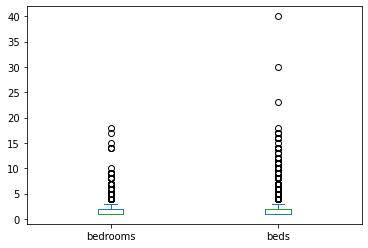

In [36]:
listings[['bedrooms','beds']].plot.box()

In [37]:
# Outlier treatment for bedrooms

Q99, Q1 = listings["bedrooms"].quantile([0.99,0.01])


listings["bedrooms"] = listings["bedrooms"].map(
    lambda x: Q99 if x > Q99 else x
)

listings["bedrooms"] = listings["bedrooms"].map(
    lambda x: Q1 if x < Q1 else x
)

In [38]:
# Outlier treatment for beds

Q99, Q1 = listings["beds"].quantile([0.99,0.01])


listings["beds"] = listings["beds"].map(
    lambda x: Q99 if x > Q99 else x
)

listings["beds"] = listings["beds"].map(
    lambda x: Q1 if x < Q1 else x
)

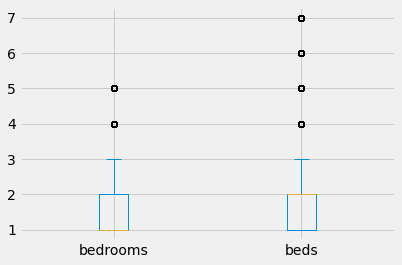

In [39]:
listings.bedrooms.fillna(listings.bedrooms.median( skipna=True), inplace=True)

listings.beds.fillna(listings.beds.median( skipna=True), inplace=True)

plt.style.use('fivethirtyeight')

listings[['bedrooms','beds']].plot.box()

plt.show()

### Target value exploration

In [40]:
listings.price.describe()

count    20681.000000
mean       137.548983
std        429.832987
min          0.000000
25%         45.000000
50%         83.000000
75%        137.000000
max      40714.000000
Name: price, dtype: float64

<AxesSubplot:>

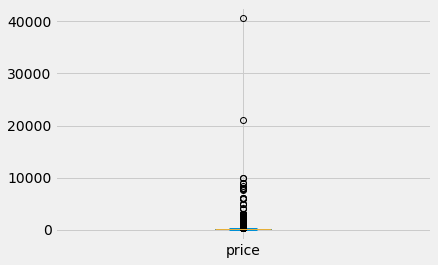

In [41]:
listings.price.plot.box()

* <font size="3"> From the box plot, we can see that there are way too many outliers and that too with extremely high variance. </font>
* <font size="3"> The model would definitely suffer with these many outliers. So, we performed outlier treatment by using Capping. </font>


Text(0.5, 1.0, 'Shared room')

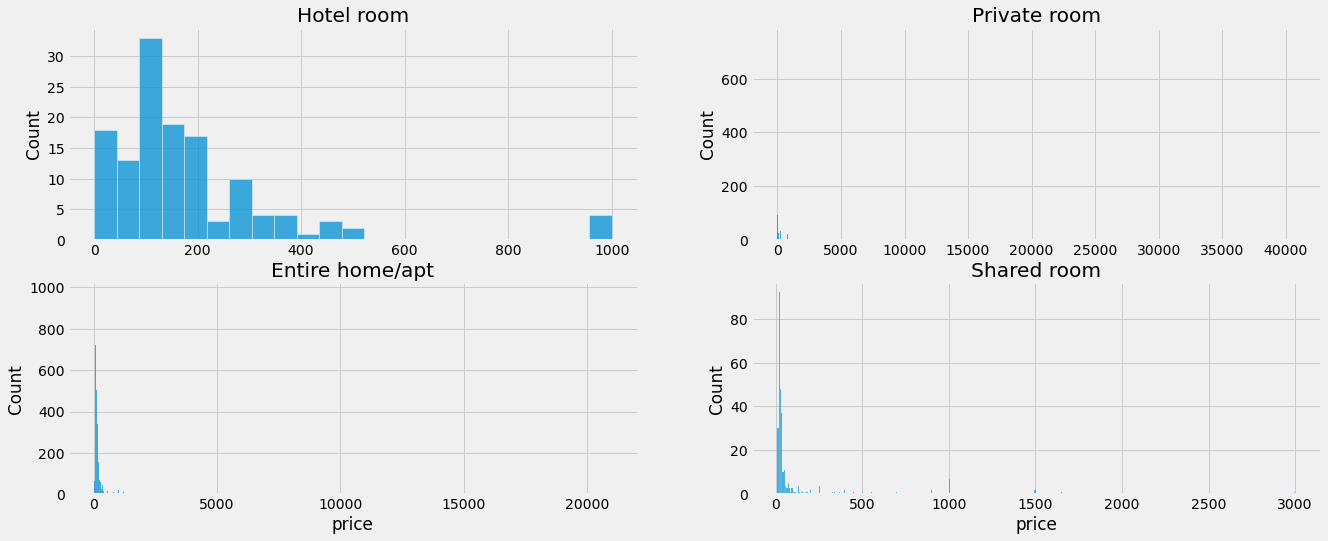

In [42]:
# Plotting the distribution of price with respect to room type

fig, axs = plt.subplots(2, 2)

fig.set_size_inches(20,8)

sns.histplot(data=listings[listings.room_type == 'Hotel room'], x="price", ax= axs[0, 0])
axs[0, 0].set_title('Hotel room')
axs[0, 0].set_xlabel('')

sns.histplot(data=listings[listings.room_type == 'Private room'], x="price", ax= axs[0, 1])
axs[0, 1].set_title('Private room')
axs[0, 1].set_xlabel('')

sns.histplot(data=listings[listings.room_type == 'Entire home/apt'], x="price", ax= axs[1, 0])
axs[1, 0].set_title('Entire home/apt')

sns.histplot(data=listings[listings.room_type == 'Shared room'], x="price", ax= axs[1, 1])
axs[1, 1].set_title('Shared room')

<font size="3"> Looking at the histplots of price with respect to room type, it looks insane to know that there ia shared room to a price upto 3000, entire home to 20000 and a private room for 40000. These are extreme outliers which are not good for the model. So, decided to drop the prices above 95 percentile in each room type because it is very unlikely for majority of people to spend huge amount of money for a day. </font>

In [43]:
listings.drop(index = listings.loc[(listings.room_type == 'Hotel room') & 
                                   (listings.price > listings[(listings.room_type == 'Hotel room')].price.quantile(0.95)), 'price'].index,
             inplace=True)

listings.drop(index = listings.loc[(listings.room_type == 'Private room') & 
                                   (listings.price > listings[(listings.room_type == 'Private room')].price.quantile(0.95)), 'price'].index,
             inplace=True)

listings.drop(index = listings.loc[(listings.room_type == 'Shared room') & 
                                   (listings.price > listings[(listings.room_type == 'Shared room')].price.quantile(0.95)), 'price'].index,
             inplace=True)

listings.drop(index = listings.loc[(listings.room_type == 'Entire home/apt') & 
                                   (listings.price > listings[(listings.room_type == 'Entire home/apt')].price.quantile(0.95)), 'price'].index,
             inplace=True)

Text(0.5, 1.0, 'Shared room')

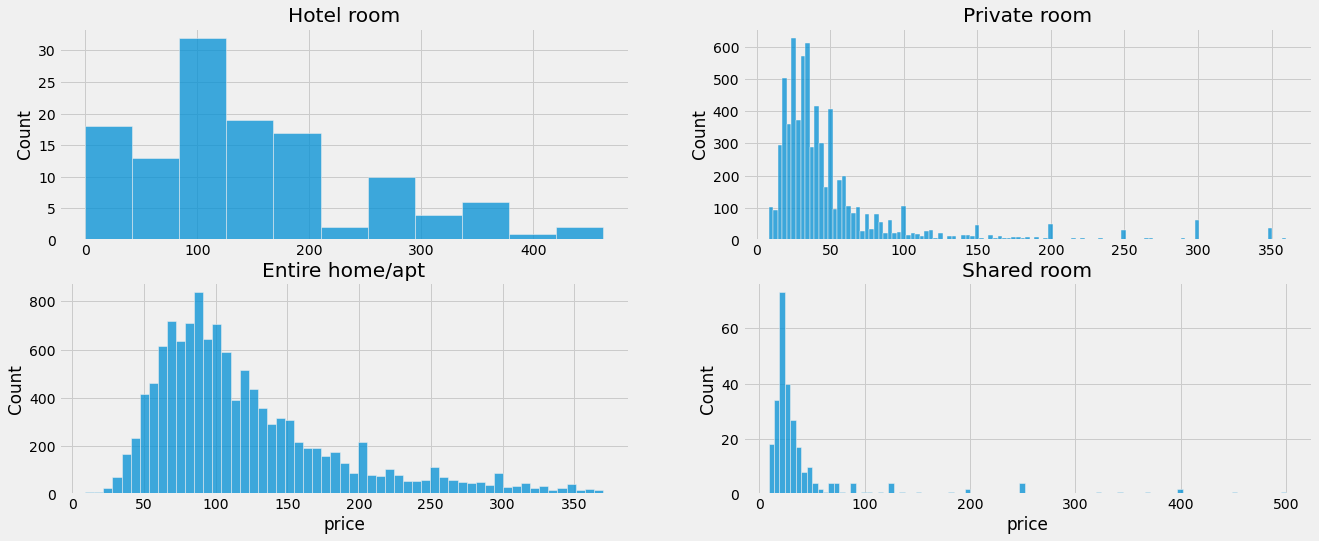

In [44]:
fig, axs = plt.subplots(2, 2)

fig.set_size_inches(20,8)

sns.histplot(data=listings[listings.room_type == 'Hotel room'], x="price", ax= axs[0, 0])
axs[0, 0].set_title('Hotel room')
axs[0, 0].set_xlabel('')

sns.histplot(data=listings[listings.room_type == 'Private room'], x="price", ax= axs[0, 1])
axs[0, 1].set_title('Private room')
axs[0, 1].set_xlabel('')

sns.histplot(data=listings[listings.room_type == 'Entire home/apt'], x="price", ax= axs[1, 0])
axs[1, 0].set_title('Entire home/apt')

sns.histplot(data=listings[listings.room_type == 'Shared room'], x="price", ax= axs[1, 1])
axs[1, 1].set_title('Shared room')

<AxesSubplot:>

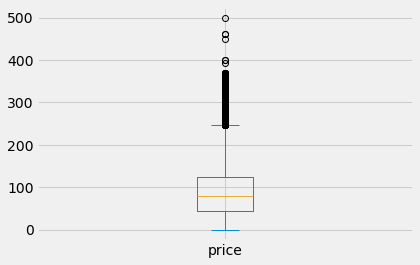

In [45]:
listings.price.plot.box()

In [46]:
listings.price.describe()

count    19650.000000
mean        96.090560
std         70.820451
min          0.000000
25%         44.000000
50%         80.000000
75%        125.000000
max        500.000000
Name: price, dtype: float64

<font size="3"> There are still many outliers but decide to keep it for the time being. Overall, this is much better to the boxplot before the treatment. </font>


In [47]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19650 entries, 0 to 20680
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_is_superhost             19650 non-null  float64
 1   host_listings_count           19650 non-null  float64
 2   host_has_profile_pic          19650 non-null  float64
 3   host_identity_verified        19650 non-null  float64
 4   neighbourhood_group_cleansed  19650 non-null  object 
 5   latitude                      19650 non-null  float64
 6   longitude                     19650 non-null  float64
 7   room_type                     19650 non-null  object 
 8   accommodates                  19650 non-null  int64  
 9   bedrooms                      19650 non-null  float64
 10  beds                          19650 non-null  float64
 11  price                         19650 non-null  float64
 12  minimum_nights                19650 non-null  int64  
 13  a

## Data Exploration


<AxesSubplot:xlabel='host_has_profile_pic', ylabel='count'>

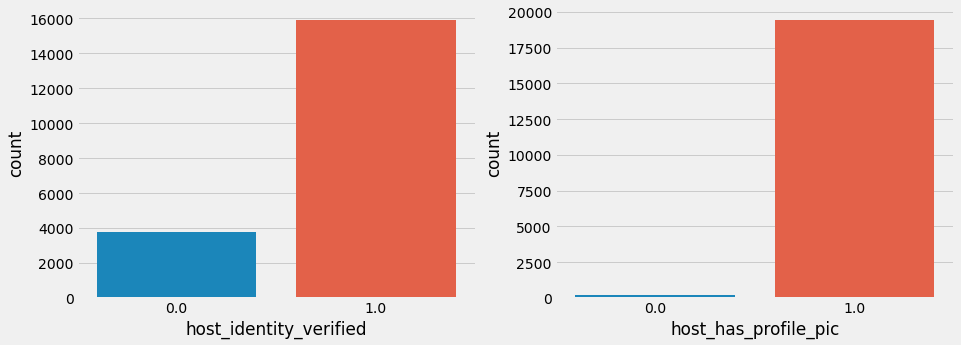

In [48]:
# Hosts identification count.

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(14,5)

sns.countplot(listings.host_identity_verified, ax =ax1)
sns.countplot(listings.host_has_profile_pic, ax =ax2)

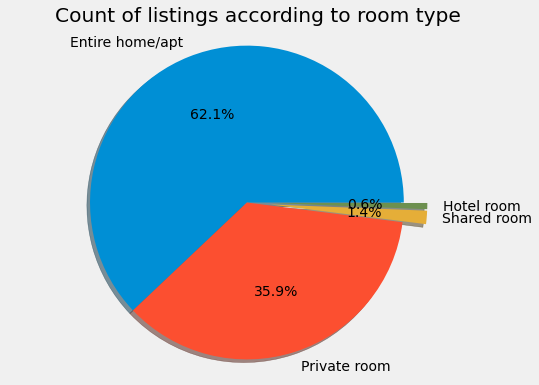

In [49]:
# Counts of listings according to the room type.

fig, ax = plt.subplots(figsize=(8,6))

explode = [0,0,0.15,0.15]
listings.room_type.value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode=explode)
plt.axis("equal")
plt.ylabel('')
plt.title('Count of listings according to room type');

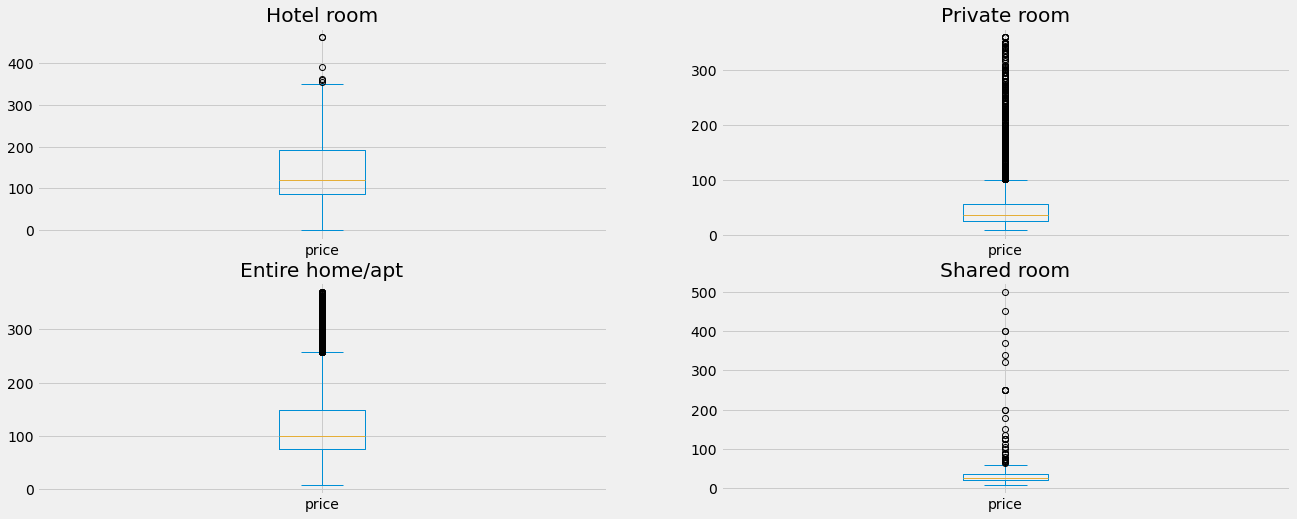

In [50]:
# Box plots of price with respect to room/type.

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_size_inches(20,8)

listings[listings.room_type == 'Hotel room'].price.plot.box(ax=ax1)
ax1.set_title('Hotel room')
ax1.set_xlabel('')

listings[listings.room_type == 'Private room'].price.plot.box(ax=ax2)
ax2.set_title('Private room')
ax2.set_xlabel('')

listings[listings.room_type == 'Entire home/apt'].price.plot.box(ax=ax3)
ax3.set_title('Entire home/apt')

listings[listings.room_type == 'Shared room'].price.plot.box(ax=ax4)
ax4.set_title('Shared room')

plt.show()

<font size="3"> We can see here that majority of outliers are in private room and entire home. It is surprising to see that, there shared rooms available at $500 per night. (Honestly, Ridiculous!). Have let it be like this for time being, but definitely noteworthy to drop some of those listings in future. </font>

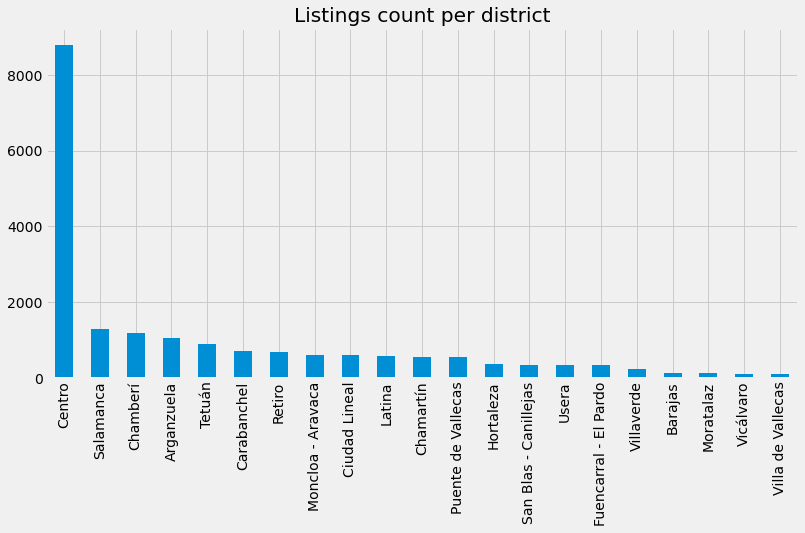

In [51]:
# Count of listing with respect to district

fig, ax = plt.subplots(figsize=(12,6))

listings.neighbourhood_group_cleansed.value_counts().plot.bar()
plt.title('Listings count per district')
plt.xlabel('')
plt.show()

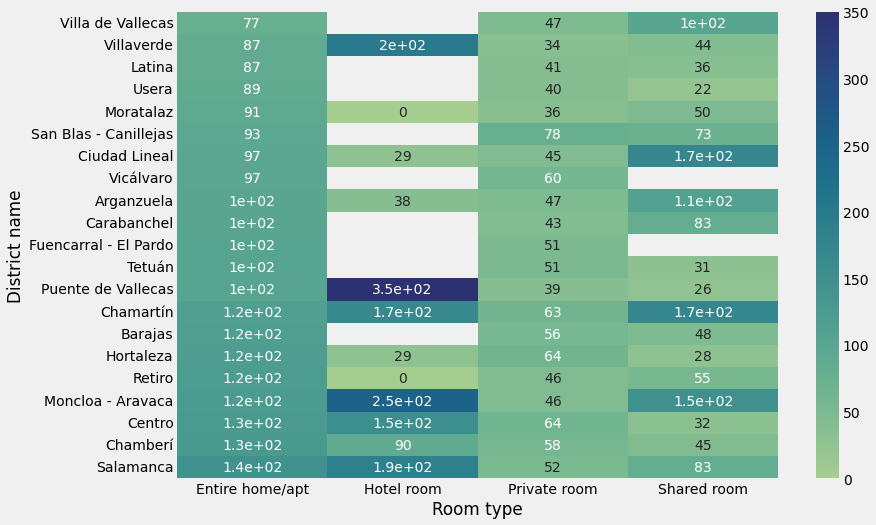

In [52]:
# Multivariate understanding of price with respect to the district and room type. 

fig, ax = plt.subplots(figsize=(12,8))

p_table = listings.pivot_table(index ='neighbourhood_group_cleansed',columns='room_type', values='price',aggfunc='mean')
p_table.sort_values(by='Entire home/apt',ascending=True, inplace=True)

sns.heatmap(p_table, annot=True, cmap="crest")

plt.xlabel('Room type')
plt.ylabel('District name')
plt.show()

* <font size="3"> The heatmap gives us some good insights. The white values are not high prices but instead says that there are no hotels or shared rooms in that particular region. </font>
* <font size="3"> Areas clearly have an influence on the price of room type. This influence changes with room type. From this, we can say that linear models might struggle but tree based models might do a good job. </font>


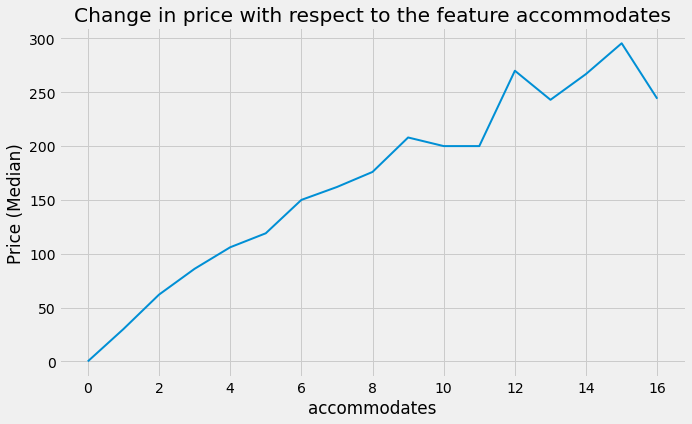

In [53]:
# Median price variation with respect to the number of people it accommodates.

listings.groupby('accommodates').quantile(0.5).price.plot(figsize=(10,6),linewidth=2)

plt.ylabel('Price (Median)')
plt.title('Change in price with respect to the feature accommodates')
plt.show()

* <font size="3"> We can see that, there is almost a linear trend of price (median) with respect to accommodates. </font>



## Modelling

* <font size="3"> We have seen the importance of room type to the price feature. With respect to location/district there is relation to the price. </font>
* <font size="3"> We need to use these object features which need to be encoded to make them useful for the model. </font>

In [54]:
l = pd.get_dummies(listings.room_type)
listings = pd.concat([listings,l], axis=1)

In [55]:
l = pd.get_dummies(listings.neighbourhood_group_cleansed)
listings = pd.concat([listings,l], axis=1)

In [56]:
listings.drop(columns=['room_type', 'neighbourhood_group_cleansed'],inplace=True)

In [57]:
X = listings.drop(["price"], axis = 1)
y = listings["price"]

<font size=3> The overall dataset is split to train and test with a test size of 30%. </font>

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Linear Regression

In [59]:
lin_reg = LinearRegression().fit(X_train, y_train)

lin_reg.score(X_train, y_train)

y_hat_lr = lin_reg.predict(X_test)
y_train_hat_lr = lin_reg.predict(X_train)

train_score_lin_reg = r2_score(y_train, y_train_hat_lr)
test_score_lin_reg = r2_score(y_test, y_hat_lr)

n = X.shape[0]
p = X.shape[1]
Adj_r2_lin_reg = 1-(1-test_score_lin_reg)*(n-1)/(n-p-1)
mse_lin_reg = mean_squared_error(y_test, y_hat_lr)

print(f"Train R2 : {round(train_score_lin_reg,3)} ")
print(f"Test R2: {round(test_score_lin_reg,3)}")
print(f"Adjusted R2 : {round(Adj_r2_lin_reg,3)}")
print(f"Mean Squared Error : {round(mean_squared_error(y_test, y_hat_lr),3)}")
print(f"Mean Absolute Error : {round(mean_absolute_error(y_test, y_hat_lr),3)}")

Train R2 : 0.462 
Test R2: 0.454
Adjusted R2 : 0.453
Mean Squared Error : 2794.783
Mean Absolute Error : 35.788


<font size="3"> The first model that we used is normal Linear Regression.</font>

* <font size="3"> As expected, the R2 score is not so great for this model, but this is expected. </font>
* <font size="3"> There are many categorical feature which generaly does not suit a linear model. </font>
* <font size="3"> Also, more the features the more complicated (higher variance) the data for the model to understand. </font>

### Ridge

In [60]:
clf = Ridge(alpha=10.0)
clf.fit(X_train, y_train)

y_hat_ridge = clf.predict(X_test)

y_hat_ridge = clf.predict(X_test)
y_train_hat_ridge = clf.predict(X_train)

train_score_ridge = r2_score(y_train, y_train_hat_ridge)
test_score_ridge = r2_score(y_test, y_hat_ridge)

n = X.shape[0]
p = X.shape[1]
Adj_r2_ridge = 1-(1-test_score_ridge)*(n-1)/(n-p-1)
mse_ridge = mean_squared_error(y_test, y_hat_ridge)

print(f"Train R2 : {round(train_score_ridge,3)} ")
print(f"Test R2: {round(test_score_ridge,3)}")
print(f"Adjusted R2 : {round(Adj_r2_ridge,3)}")
print(f"Mean Squared Error : {round(mean_squared_error(y_test, y_hat_ridge),3)}")
print(f"Mean Absolute Error : {round(mean_absolute_error(y_test, y_hat_ridge),3)}")

Train R2 : 0.461 
Test R2: 0.454
Adjusted R2 : 0.453
Mean Squared Error : 2792.925
Mean Absolute Error : 35.791


<font size=3> As ridge is even a linear model, we do not expect any huge different in the scores compared to simple linear regression. </font>

### Linear model

In [61]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_hat_lasso = lasso.predict(X_test)
y_train_hat_lasso = lasso.predict(X_train)

train_score_lasso = r2_score(y_train, y_train_hat_lasso)
test_score_lasso = r2_score(y_test, y_hat_lasso)

n = X.shape[0]
p = X.shape[1]
Adj_r2_lasso = 1-(1-test_score_lasso)*(n-1)/(n-p-1)
mse_lasso = mean_squared_error(y_test, y_hat_lasso)

print(f"Train R2 : {round(train_score_lasso,3)} ")
print(f"Test R2: {round(test_score_lasso,3)}")
print(f"Adjusted R2 : {round(Adj_r2_lasso,3)}")
print(f"Mean Squared Error : {round(mean_squared_error(y_test, y_hat_lasso),3)}")
print(f"Mean Absolute Error : {round(mean_absolute_error(y_test, y_hat_lasso),3)}")

Train R2 : 0.458 
Test R2: 0.453
Adjusted R2 : 0.452
Mean Squared Error : 2800.098
Mean Absolute Error : 35.761


<font size=3> Similar to ridge, lasso is also a linear model. We can affirm our previous understanding from the R2 values. </font>

### Decision Tree

In [62]:
dt_reg = DecisionTreeRegressor(criterion='mse',max_depth=8)
dt_reg.fit(X_train, y_train)

y_hat_dt = dt_reg.predict(X_test)
y_train_hat_dt = dt_reg.predict(X_train)

train_score_dt = r2_score(y_train, y_train_hat_dt)
test_score_dt = r2_score(y_test, y_hat_dt)

n = X.shape[0]
p = X.shape[1]
Adj_r2_dt = 1-(1-test_score_dt)*(n-1)/(n-p-1)
mse_dt = mean_squared_error(y_test, y_hat_dt)

print(f"Train R2 : {round(train_score_dt,3)} ")
print(f"Test R2: {round(test_score_dt,3)}")
print(f"Adjusted R2 : {round(Adj_r2_dt,3)}")
print(f"Mean Squared Error : {round(mean_squared_error(y_test, y_hat_dt),3)}")
print(f"Mean Absolute Error : {round(mean_absolute_error(y_test, y_hat_dt),3)}")

Train R2 : 0.598 
Test R2: 0.492
Adjusted R2 : 0.491
Mean Squared Error : 2600.31
Mean Absolute Error : 32.784


### Random Forest

In [63]:
rf = RandomForestRegressor(n_estimators=500, max_depth=25, min_samples_split=5)
rf.fit(X_train, y_train) 

y_hat_rf = rf.predict(X_test)
y_train_hat_rf = rf.predict(X_train)

train_score_rf = r2_score(y_train, y_train_hat_rf)
test_score_rf = r2_score(y_test, y_hat_rf)

n = X.shape[0]
p = X.shape[1]
Adj_r2_rf = 1-(1-test_score_rf)*(n-1)/(n-p-1)
mse_rf = mean_squared_error(y_test, y_hat_rf)

print(f"Train R2 : {round(train_score_rf,3)} ")
print(f"Test R2: {round(test_score_rf,3)}")
print(f"Adjusted R2 : {round(Adj_r2_rf,3)}")
print(f"Mean Squared Error : {round(mean_squared_error(y_test, y_hat_rf),3)}")
print(f"Mean Absolute Error : {round(mean_absolute_error(y_test, y_hat_rf),3)}")

Train R2 : 0.919 
Test R2: 0.615
Adjusted R2 : 0.614
Mean Squared Error : 1971.559
Mean Absolute Error : 28.376


* <font size="3"> Random forest is a tree based model. Intuitively, a tree model would be able to understand the changes/variations much deeper to that of a linear model. But, there is a high chance of getting the data overfit. </font>
* <font size="3"> Though our R2 value for test is good, the R2 for train is 0.9 which is an indicator of overfitting.  </font>

### XGBoost

In [64]:
xgboost = XGBRegressor()
xgboost.fit(X_train, y_train) 

y_hat_xgboost = xgboost.predict(X_test)
y_train_hat_xgboost = xgboost.predict(X_train)

train_score_xgboost = r2_score(y_train, y_train_hat_xgboost)
test_score_xgboost = r2_score(y_test, y_hat_xgboost)

n = X.shape[0]
p = X.shape[1]
Adj_r2_xgboost = 1-(1-test_score_xgboost)*(n-1)/(n-p-1)
mse_xgboost = mean_squared_error(y_test, y_hat_xgboost)

print(f"Train R2 : {round(train_score_xgboost,3)} ")
print(f"Test R2: {round(test_score_xgboost,3)}")
print(f"Adjusted R2 : {round(Adj_r2_xgboost,3)}")
print(f"Mean Squared Error : {round(mean_squared_error(y_test, y_hat_xgboost),3)}")
print(f"Mean Absolute Error : {round(mean_absolute_error(y_test, y_hat_xgboost),3)}")

Train R2 : 0.863 
Test R2: 0.623
Adjusted R2 : 0.622
Mean Squared Error : 1931.667
Mean Absolute Error : 28.942


* <font size="3"> XGBoost is a tree based model similar to Random Forest but works on gradiant boosting. </font>
* <font size="3"> From the R2 values, we can see that XGBoost does a better job in predicting the price without significantly overfitting the data.  </font>

### LTB Regressor

In [65]:
ltb = LGBMRegressor()
ltb.fit(X_train, y_train) 

y_hat_ltb = ltb.predict(X_test)
y_train_hat_ltb = ltb.predict(X_train)

train_score_ltb = r2_score(y_train, y_train_hat_ltb)
test_score_ltb = r2_score(y_test, y_hat_ltb)

n = X.shape[0]
p = X.shape[1]
Adj_r2_ltb = 1-(1-test_score_ltb)*(n-1)/(n-p-1)
mse_ltb = mean_squared_error(y_test, y_hat_ltb)

print(f"Train R2 : {round(train_score_ltb,3)} ")
print(f"Test R2: {round(test_score_ltb,3)}")
print(f"Adjusted R2 : {round(Adj_r2_ltb,3)}")
print(f"Mean Squared Error : {round(mean_squared_error(y_test, y_hat_ltb),3)}")
print(f"Mean Absolute Error : {round(mean_absolute_error(y_test, y_hat_ltb),3)}")

Train R2 : 0.743 
Test R2: 0.649
Adjusted R2 : 0.648
Mean Squared Error : 1798.282
Mean Absolute Error : 27.542


<font size=3> From all the models that we have seen till now Light Gradiant Boost does the best job of predicting the price without overfitting the data to a good deal. </font>

## Feature importance of different models

### RF

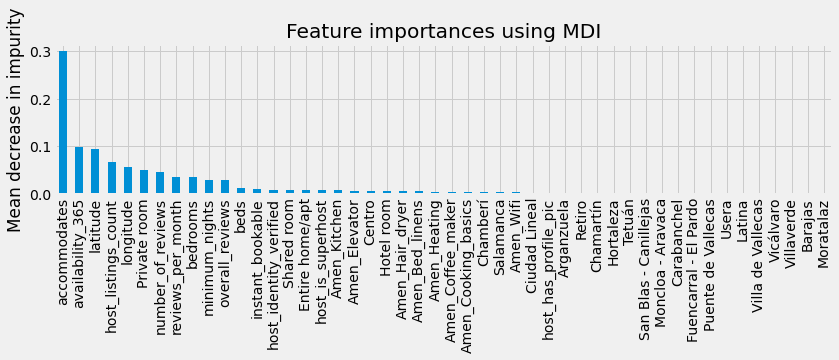

In [66]:
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)


fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax, figsize=(12,5))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### XGBoost

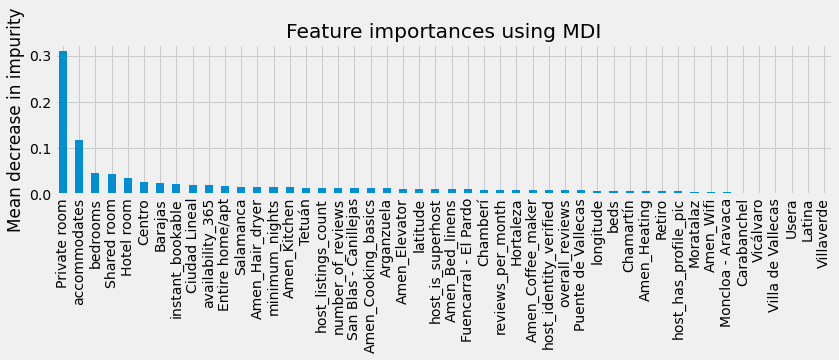

In [67]:
importances = xgboost.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)


fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax, figsize=(12,5))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### LTB

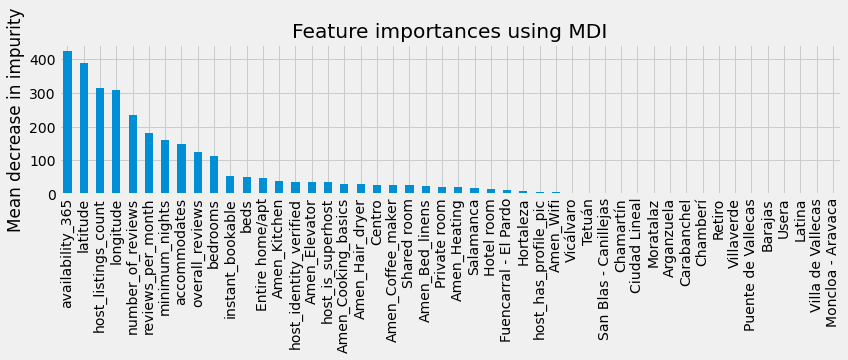

In [68]:
importances = ltb.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)


fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax, figsize=(12,5))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Manual Parameter tuning

### RF2

In [69]:
rf = RandomForestRegressor(n_estimators=400, max_features='sqrt', min_samples_split=2,
                          bootstrap = False, min_samples_leaf=1)
rf.fit(X_train, y_train) 

y_hat_rf = rf.predict(X_test)
y_train_hat_rf = rf.predict(X_train)

train_score_rf = r2_score(y_train, y_train_hat_rf)
test_score_rf = r2_score(y_test, y_hat_rf)

n = X.shape[0]
p = X.shape[1]
Adj_r2_rf = 1-(1-test_score_rf)*(n-1)/(n-p-1)
mse_rf = mean_squared_error(y_test, y_hat_rf)

print(f"Train R2 : {round(train_score_rf,3)} ")
print(f"Test R2: {round(test_score_rf,3)}")
print(f"Adjusted R2 : {round(Adj_r2_rf,3)}")
print(f"Mean Squared Error : {round(mean_squared_error(y_test, y_hat_rf),3)}")
print(f"Mean Absolute Error : {round(mean_absolute_error(y_test, y_hat_rf),3)}")

Train R2 : 1.0 
Test R2: 0.652
Adjusted R2 : 0.651
Mean Squared Error : 1782.951
Mean Absolute Error : 26.777


<font size="3"> Parameter Tuning of RF: </font>

* <font size="3"> These parameters that are used here overfits the data extremely. This is definitely not a good model though R2 got better but not significantly compared to train. It wont do a good job in predicting for new data which the model hasnt seen </font>
 

### RF3

In [70]:
rf = RandomForestRegressor(n_estimators=400, max_features='sqrt', min_samples_split=10,
                          bootstrap = False, min_samples_leaf=1, max_depth=25)
rf.fit(X_train, y_train) 

y_hat_rf = rf.predict(X_test)
y_train_hat_rf = rf.predict(X_train)

train_score_rf = r2_score(y_train, y_train_hat_rf)
test_score_rf = r2_score(y_test, y_hat_rf)

n = X.shape[0]
p = X.shape[1]
Adj_r2_rf = 1-(1-test_score_rf)*(n-1)/(n-p-1)
mse_rf = mean_squared_error(y_test, y_hat_rf)

print(f"Train R2 : {round(train_score_rf,3)} ")
print(f"Test R2: {round(test_score_rf,3)}")
print(f"Adjusted R2 : {round(Adj_r2_rf,3)}")
print(f"Mean Squared Error : {round(mean_squared_error(y_test, y_hat_rf),3)}")
print(f"Mean Absolute Error : {round(mean_absolute_error(y_test, y_hat_rf),3)}")

Train R2 : 0.901 
Test R2: 0.637
Adjusted R2 : 0.636
Mean Squared Error : 1856.611
Mean Absolute Error : 27.571


<font size="3"> Parameter Tuning of RF: </font>

* <font size="3"> These parameters do a better job as they increase the Test R2 without increasing train R2.</font>
 

### XGBoost 2

In [71]:
xgboost = XGBRegressor(n_estimators=100, max_depth=10, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgboost.fit(X_train, y_train) 

y_hat_xgboost = xgboost.predict(X_test)
y_train_hat_xgboost = xgboost.predict(X_train)

train_score_xgboost = r2_score(y_train, y_train_hat_xgboost)
test_score_xgboost = r2_score(y_test, y_hat_xgboost)

n = X.shape[0]
p = X.shape[1]
Adj_r2_xgboost = 1-(1-test_score_xgboost)*(n-1)/(n-p-1)
mse_xgboost = mean_squared_error(y_test, y_hat_xgboost)

print(f"Train R2 : {round(train_score_xgboost,3)} ")
print(f"Test R2: {round(test_score_xgboost,3)}")
print(f"Adjusted R2 : {round(Adj_r2_xgboost,3)}")
print(f"Mean Squared Error : {round(mean_squared_error(y_test, y_hat_xgboost),3)}")
print(f"Mean Absolute Error : {round(mean_absolute_error(y_test, y_hat_xgboost),3)}")

Train R2 : 0.945 
Test R2: 0.648
Adjusted R2 : 0.647
Mean Squared Error : 1803.218
Mean Absolute Error : 27.101


### XGBoost3

In [72]:
xgboost = XGBRegressor(n_estimators=100, max_depth=10, eta=0.05, subsample=0.8, colsample_bytree=0.7, min_child_weight=5)
xgboost.fit(X_train, y_train) 

y_hat_xgboost = xgboost.predict(X_test)
y_train_hat_xgboost = xgboost.predict(X_train)

train_score_xgboost = r2_score(y_train, y_train_hat_xgboost)
test_score_xgboost = r2_score(y_test, y_hat_xgboost)

n = X.shape[0]
p = X.shape[1]
Adj_r2_xgboost = 1-(1-test_score_xgboost)*(n-1)/(n-p-1)
mse_xgboost = mean_squared_error(y_test, y_hat_xgboost)

print(f"Train R2 : {round(train_score_xgboost,3)} ")
print(f"Test R2: {round(test_score_xgboost,3)}")
print(f"Adjusted R2 : {round(Adj_r2_xgboost,3)}")
print(f"Mean Squared Error : {round(mean_squared_error(y_test, y_hat_xgboost),3)}")
print(f"Mean Absolute Error : {round(mean_absolute_error(y_test, y_hat_xgboost),3)}")

Train R2 : 0.868 
Test R2: 0.651
Adjusted R2 : 0.65
Mean Squared Error : 1786.498
Mean Absolute Error : 27.008


<font size=3> From all the three XGBoost models, we can say that the parameters used in 3rd model does the best job with respect to Test and Train R2 scores. </font> 

### LGBM2

In [73]:
ltb = LGBMRegressor(n_estimators = 150, num_leaves=35,min_child_samples=25)
ltb.fit(X_train, y_train) 

y_hat_ltb = ltb.predict(X_test)
y_train_hat_ltb = ltb.predict(X_train)

train_score_ltb = r2_score(y_train, y_train_hat_ltb)
test_score_ltb = r2_score(y_test, y_hat_ltb)

n = X.shape[0]
p = X.shape[1]
Adj_r2_ltb = 1-(1-test_score_ltb)*(n-1)/(n-p-1)
mse_ltb = mean_squared_error(y_test, y_hat_ltb)

print(f"Train R2 : {round(train_score_ltb,3)} ")
print(f"Test R2: {round(test_score_ltb,3)}")
print(f"Adjusted R2 : {round(Adj_r2_ltb,3)}")
print(f"Mean Squared Error : {round(mean_squared_error(y_test, y_hat_ltb),3)}")
print(f"Mean Absolute Error : {round(mean_absolute_error(y_test, y_hat_ltb),3)}")

Train R2 : 0.784 
Test R2: 0.656
Adjusted R2 : 0.655
Mean Squared Error : 1760.327
Mean Absolute Error : 27.218


<font size=3> These parameters improve the R2 scores for Light Gradiant Boosting. Overall the models, the best would be this boosting algorithm as it has the best R2 score, best ratio from train and test scores and also the least mean squared error. </font>

## Results

In [74]:
res_dic = { 'Model': ['Linear Regression','Ridge Regression', 'Lasso', 'Decision Tree', 'Random Forest', 'XGBOOST', 'Light GBM'],
            'Adjusted R2' : [Adj_r2_lin_reg, Adj_r2_ridge, Adj_r2_lasso, Adj_r2_dt, Adj_r2_rf, Adj_r2_xgboost, Adj_r2_ltb],
           'Mean Squared Error' : [mse_lin_reg, mse_ridge, mse_lasso, mse_dt, mse_rf, mse_xgboost, mse_ltb]
}

res_df = pd.DataFrame(res_dic)

def custom_style(row):

    color = 'white'
    if row.values[0] == 'Light GBM':
        color = 'lightgreen'

    return ['background-color: %s' % color]*len(row.values)

res_df.style.apply(custom_style, axis=1).hide_index()

Model,Adjusted R2,Mean Squared Error
Linear Regression,0.452706,2794.782972
Ridge Regression,0.453070,2792.925122
Lasso,0.451665,2800.098003
Decision Tree,0.490789,2600.309650
Random Forest,0.636425,1856.611075
XGBOOST,0.650155,1786.497595
Light GBM,0.655280,1760.327406


<font size=3> From the results table we can see that Light GBM is the best model. Though XGBoost results are pretty similar, Light GBM surpasses it with its speed of execution significantly. To further improve the model, we can further play with the price feature as there are still way too many outliers.</font>